In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.io.arff import loadarff 


In [3]:
data_dir = "dataset/"
data_arff = loadarff(data_dir + "MagicTelescope.arff")
data = pd.DataFrame(data_arff[0])

In [4]:
data

,ID,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,1.0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,b'g'
1,2.0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,b'g'
2,3.0,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,b'g'
3,4.0,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,b'g'
4,5.0,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,b'g'
...,...,...,...,...,...,...,...,...,...,...,...,...
19015,19016.0,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,b'h'
19016,19017.0,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,b'h'
19017,19018.0,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,b'h'
19018,19019.0,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,b'h'


In [5]:
# Print dataframe column names
print(data.columns)

Index(['ID', 'fLength:', 'fWidth:', 'fSize:', 'fConc:', 'fConc1:', 'fAsym:',
       'fM3Long:', 'fM3Trans:', 'fAlpha:', 'fDist:', 'class:'],
      dtype='object')


## Scikitlearn implementation

In [6]:

%pip install latex

Note: you may need to restart the kernel to use updated packages.


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_approximation import RBFSampler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

/Users/richard/anaconda3/envs/csc2515/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/richard/anaconda3/envs/csc2515/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/richard/anaconda3/envs/csc2515/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

Gamma: 0.00
Train Accuracy: 0.6480
Test Accuracy: 0.6493
Gamma: 0.05
Train Accuracy: 0.8510
Test Accuracy: 0.8482
Gamma: 0.10
Train Accuracy: 0.8493
Test Accuracy: 0.8447
Gamma: 0.15
Train Accuracy: 0.8442
Test Accuracy: 0.8400
Gamma: 0.20
Train Accuracy: 0.8370
Test Accuracy: 0.8356
Gamma: 0.25
Train Accuracy: 0.8299
Test Accuracy: 0.8309
Gamma: 0.30
Train Accuracy: 0.8209
Test Accuracy: 0.8226
Gamma: 0.35
Train Accuracy: 0.8139
Test Accuracy: 0.8144
Gamma: 0.40
Train Accuracy: 0.8064
Test Accuracy: 0.8060
Gamma: 0.45
Train Accuracy: 0.7989
Test Accuracy: 0.7969
Gamma: 0.50
Train Accuracy: 0.7897
Test Accuracy: 0.7890
Gamma: 0.55
Train Accuracy: 0.7838
Test Accuracy: 0.7811
Gamma: 0.60
Train Accuracy: 0.7785
Test Accuracy: 0.7769
Gamma: 0.65
Train Accuracy: 0.7748
Test Accuracy: 0.7716
Gamma: 0.70
Train Accuracy: 0.7670
Test Accuracy: 0.7652
Gamma: 0.75
Train Accuracy: 0.7612
Test Accuracy: 0.7610
Gamma: 0.80
Train Accuracy: 0.7559
Test Accuracy: 0.7578
Gamma: 0.85
Train Accuracy: 0.7

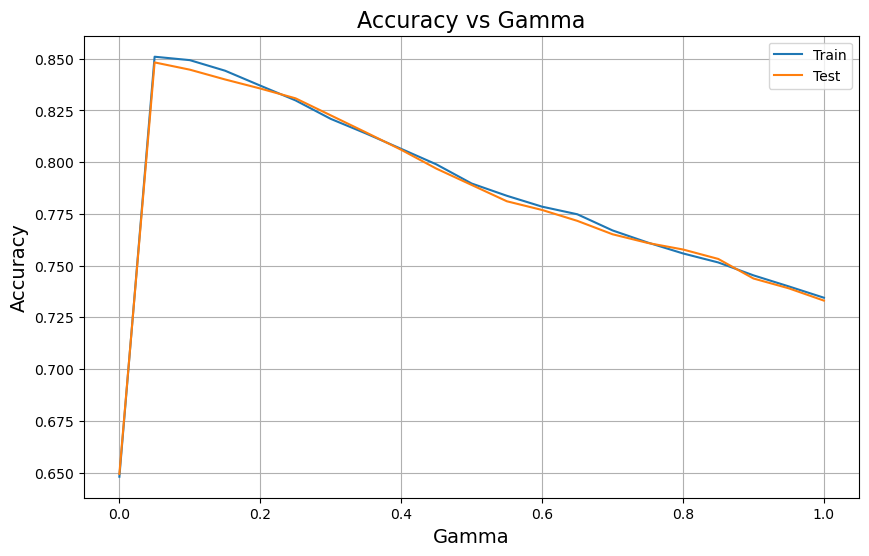

In [8]:
import matplotlib as mpl
from matplotlib import rcParams
rcParams.update(mpl.rcParamsDefault)


X = data.drop(['ID', 'class:'], axis=1)
Y = data['class:'].astype(str)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply Random Fourier Features
n_rff_features = 100  # Number of random Fourier features
gammas = np.arange(0, 1.05, 0.05)  # RBF kernel parameter

train_accuracies = []
test_accuracies = []

for gamma in gammas:
    # Create the RFF transformer
    rff = RBFSampler(n_components=n_rff_features, gamma=gamma, random_state=24)
    X_train_rff = rff.fit_transform(X_train_scaled)
    X_test_rff = rff.transform(X_test_scaled)

    # Train a logistic regression model
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_rff, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train_rff)
    y_test_pred = model.predict(X_test_rff)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    classification_rep = classification_report(y_test, y_test_pred, target_names=label_encoder.classes_)

    # Store results
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
    # Print results
    print(f"Gamma: {gamma:.2f}")
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    # print("Classification Report:")
    # print(classification_rep)


# Use LateX for rendering
rcParams['text.usetex'] = False # True
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(gammas, train_accuracies, label="Train")
plt.plot(gammas, test_accuracies, label="Test")
plt.xlabel("Gamma", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Accuracy vs Gamma", fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [13]:
print(classification_rep)

              precision    recall  f1-score   support

           g       0.76      0.87      0.81      3705
           h       0.66      0.48      0.56      2001

    accuracy                           0.73      5706
   macro avg       0.71      0.68      0.68      5706
weighted avg       0.72      0.73      0.72      5706



# Hand implementation

In [22]:
# sample omega(w) from spherical gaussian
D = 100 # number of features
mu = np.zeros((D,))
cov = np.eye(D)
generator = np.random.default_rng()
w = generator.multivariate_normal(mu, cov)

In [23]:
w.shape

(100,)

In [25]:
plt.plot(w)
plt.show()

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 640x480 with 1 Axes>